# Explore Other Models

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import help_function as hf  # customized help functions
%matplotlib inline

df = pd.read_csv('data/ai4i2020.csv')

X = df.drop(columns='Machine failure')
y = df['Machine failure']

# train test split
# use stratify to enforce the proportion in the splits
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y)

In [2]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()
pipe = hf.create_pipe(clf)

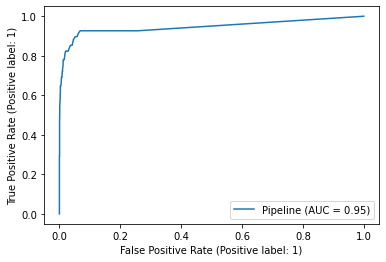

In [5]:
# Search for the best cutoff threshold
# It seems the 0.1 is a good choice
hf.RocCurveDisplay.from_estimator(pipe, X_test, y_test);

{'recall': 0.75, 'precision': 0.6710526315789473, 'f1': 0.7083333333333334}

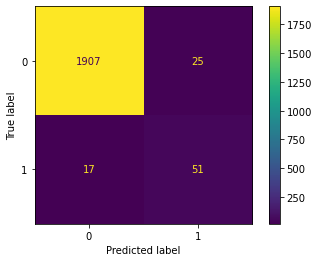

In [25]:
# Seems reasonable to set the cutoff point at 0.23
# and calculate the lables
y_hats = hf.soft_to_hard(pipe, X_test, cutoff=0.25)
hf.evaluate(y_test, y_hats)

In [26]:
from sklearn.model_selection import StratifiedKFold, KFold

k_fold = 30        # set 30 splits
kf = KFold(n_splits=k_fold)

# do the split and train
scores = []
for train_idx, test_idx in kf.split(X_train):    
    X_train_fold, X_test_fold = X_train.iloc[train_idx], X_train.iloc[test_idx]
    y_train_fold, y_test_fold = y_train.iloc[train_idx], y_train.iloc[test_idx]    
    
    pipe.fit(X_train_fold, y_train_fold)
    y_hats = hf.soft_to_hard(pipe, X_test_fold, cutoff=0.24)
    score = hf.evaluate(y_test_fold, y_hats, cm=False)
    scores.append(score)

In [27]:
# calculate the average recall, precision, and f1
recall, precision, f1 = [], [], []
for score in scores:    
    recall.append(score['recall'])
    precision.append(score['precision'])
    f1.append(score['f1'])
print('Mean Recall: ', np.array(recall).mean())
print('Mean Precision: ', np.array(precision).mean())
print('Mean F1: ', np.array(f1).mean())

Mean Recall:  0.8023834498834499
Mean Precision:  0.6687271524771525
Mean F1:  0.7187266399927098
